In [18]:
# 📦 Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics.pairwise import cosine_similarity
import random
import tensorflow as tf


In [19]:
# 📁 Step 2: Set Paths
dataset_path = "dataset"
test_path = "testing_folder"
model_path = "model/rat_cnn_model.keras"
# 📂 Step 3: Create Dataset Directory if it doesn't exis    t

In [20]:
# 🖼️ Step 3: Data Preprocessing
img_size = (150, 150)
batch_size = 16

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [21]:
# 🧠 Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Zain Latif\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 🚀 Step 5: Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


c:\Users\Zain Latif\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.7050 - loss: 2.8998 - val_accuracy: 0.7143 - val_loss: 0.5564
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.7121 - loss: 0.5931 - val_accuracy: 0.7143 - val_loss: 0.6619
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.7025 - loss: 0.6344 - val_accuracy: 0.7143 - val_loss: 0.5974
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.7330 - loss: 0.6068 - val_accuracy: 0.7143 - val_loss: 0.5492
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.8024 - loss: 0.4956 - val_accuracy: 0.7857 - val_loss: 0.4670


In [23]:
# 💾 Step 6: Save Model
os.makedirs("model", exist_ok=True)
model.save(model_path)


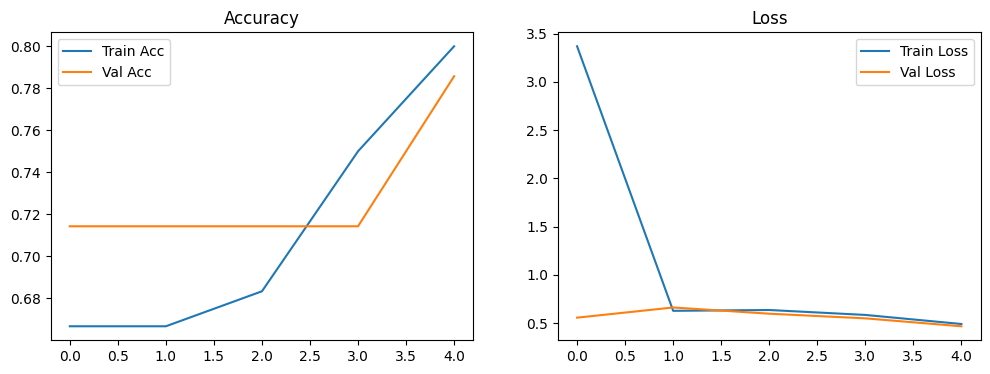

In [24]:
# 📈 Step 7: Plot Accuracy & Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Prediction: Rat Detected 🐀 (0.63)


C:\Users\Zain Latif\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128000 (\N{RAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


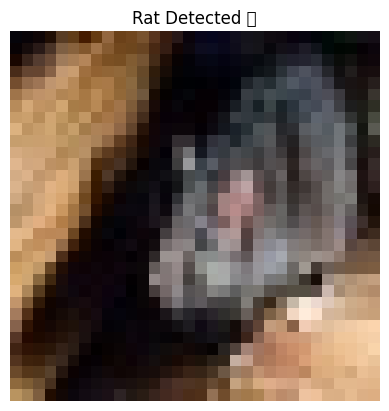

In [25]:
# 🔍 Step 8: Predict Image in testing_folder
model = load_model(model_path)

test_img_name = os.listdir(test_path)[0]
test_img_path = os.path.join(test_path, test_img_name)

img = load_img(test_img_path, target_size=img_size)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
result = "Rat Detected 🐀" if prediction > 0.5 else "No Rat Detected ❌"

print(f"Prediction: {result} ({prediction:.2f})")

plt.imshow(load_img(test_img_path))
plt.axis('off')
plt.title(result)
plt.show()


In [ ]:
# 🧠 Step 9: Feature Similarity Comparison to Rat Images

# ✅ Rebuild the feature extractor model AFTER the CNN is built and called (trained or predicted at least once)
# Get output from the second last Dense layer (just before classification)
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

# ✅ Function to extract features from an image using the trained CNN
def extract_features(image_path):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return feature_extractor.predict(img_array)

# ✅ Select 5 random images from the 'rat' folder
rat_folder = os.path.join(dataset_path, "rat")
rat_images = random.sample(os.listdir(rat_folder), min(5, len(os.listdir(rat_folder))))

# ✅ Extract features of test image
test_features = extract_features(test_img_path)

similarities = []
labels = []

# ✅ Calculate cosine similarity between test image and each selected rat image
for rat_img in rat_images:
    rat_path = os.path.join(rat_folder, rat_img)
    rat_features = extract_features(rat_path)
    similarity = cosine_similarity(test_features, rat_features)[0][0]  # Value between 0 and 1
    similarities.append(similarity)
    labels.append(rat_img)

# ✅ Plot the similarities
plt.figure(figsize=(10, 4))
plt.bar(labels, similarities, color='green')
plt.title("🔍 Similarity of Test Image to Rat Images (Cosine Similarity)")
plt.xlabel("Rat Image File Names")
plt.ylabel("Similarity Score (0 to 1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: The layer sequential_3 has never been called and thus has no defined input.